In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np


In [ ]:
import numpy as np

import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.ticker as ticker

import seaborn as sns
sns.set_style('whitegrid')

from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from sklearn import metrics

import warnings

import datetime
from datetime import timedelta 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dff = pd.read_csv('/content/drive/MyDrive/busybee/one_year_occupancy.txt', delimiter = "\t")

In [ ]:
df_room1=dff[dff['area_id'] == 'f5017bd4-085c-4efb-a38e-389f4ee42d82']

In [ ]:
df_room1.shape

(278015, 4)

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 


In [ ]:
Image(url= "/home/reenal/busybee/correlations.png")

In [ ]:
Image(url= "/home/reenal/busybee/predictive_power_score.png")

In [ ]:
df=df_room1

In [ ]:
import datetime as dt

df['timestamp'] = pd.to_datetime(df['timestamp'])
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df["second"] = df["timestamp"].dt.second
df['weekday'] = df[['timestamp']].apply(lambda x: dt.datetime.strftime(x['timestamp'], '%A'), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

# New Section

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['year'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['year'])
chart_data = chart_data.rename(columns={'year': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by year'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'year'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
     iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['month'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['month'])
chart_data = chart_data.rename(columns={'month': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by month'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'month'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['day'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['day'])
chart_data = chart_data.rename(columns={'day': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by day'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'day'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['hour'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['hour'])
chart_data = chart_data.rename(columns={'hour': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by hour'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'hour'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
     iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['weekday'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['weekday'])
chart_data = chart_data.rename(columns={'weekday': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by weekday'},
    'xaxis': {'title': {'text': 'weekday'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.set_index('timestamp').index.to_period('W').to_timestamp(how='end').values, index=df.index, name='timestamp|W'),
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['timestamp|W'])
chart_data = chart_data.rename(columns={'timestamp|W': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by timestamp (Weekly)'},
    'xaxis': {'title': {'text': 'timestamp (Weekly)'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
    chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.set_index('timestamp').index.to_period('M').to_timestamp(how='end').values, index=df.index, name='timestamp|M'),
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['timestamp|M'])
chart_data = chart_data.rename(columns={'timestamp|M': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by timestamp (Monthly)'},
    'xaxis': {'title': {'text': 'timestamp (Monthly)'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	pd.Series(df.set_index('timestamp').index.to_period('Q').to_timestamp(how='end').values, index=df.index, name='timestamp|Q'),
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['timestamp|Q'])
chart_data = chart_data.rename(columns={'timestamp|Q': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
	x=chart_data['x'],
	y=chart_data['occupancy|nunique']
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by timestamp (Quarterly)'},
    'xaxis': {'title': {'text': 'timestamp (Quarterly)'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['month'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['month'])
chart_data = chart_data.rename(columns={'month': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['occupancy|nunique'], name='occupancy|nunique', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by month'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'month'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['day'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['day'])
chart_data = chart_data.rename(columns={'day': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['occupancy|nunique'], name='occupancy|nunique', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by day'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'day'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['hour'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['hour'])
chart_data = chart_data.rename(columns={'hour': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['occupancy|nunique'], name='occupancy|nunique', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by hour'},
    'xaxis': {'tickformat': '0:g', 'title': {'text': 'hour'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

In [ ]:
# DISCLAIMER: 'df' refers to the data you passed in when calling 'dtale.show'

import pandas as pd

if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
	df = df.to_frame(index=False)

# remove any pre-existing indices for ease of use in the D-Tale code, but this is not required
df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]  # update columns to strings in case they are numbers

chart_data = pd.concat([
	df['weekday'],
	df['occupancy'],
], axis=1)
chart_data = chart_data.sort_values(['weekday'])
chart_data = chart_data.rename(columns={'weekday': 'x'})
chart_data_nunique = chart_data.groupby(['x'])[['occupancy']].nunique()
chart_data_nunique.columns = ['occupancy|nunique']
chart_data = chart_data_nunique.reset_index()
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
	x=chart_data['x'], y=chart_data['occupancy|nunique'], name='occupancy|nunique', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Unique Count of occupancy by weekday'},
    'xaxis': {'title': {'text': 'weekday'}},
    'yaxis': {'tickformat': '0:g', 'title': {'text': 'Unique Count of occupancy'}, 'type': 'linear'}
}))

# If you're having trouble viewing your chart in your notebook try passing your 'chart' into this snippet:
#
from plotly.offline import iplot, init_notebook_mode
#
init_notebook_mode(connected=True)
for chart in charts:
     chart.pop('id', None) # for some reason iplot does not like 'id'
iplot(figure)

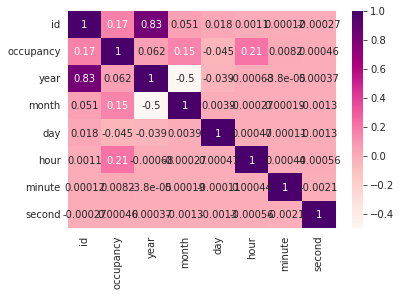

In [ ]:
corr = df_room1.corr(method='pearson')
sns.heatmap(corr, cmap="RdPu", annot=True)

In [ ]:
df_room1.shape

(278015, 11)

In [ ]:

from scipy.stats import kendalltau, pearsonr, spearmanr

def kendall_pval(x,y):
    return kendalltau(x,y)[1]
    
def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]
    
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [ ]:
corr_kendall = df_room1.corr(method=kendall_pval)
corr_kendall

,id,occupancy,year,month,day,hour,minute,second
id,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.475384e-149,0.286089,9.084574e-01,0.758482
occupancy,0.000000e+00,1.000000e+00,1.771275e-266,9.978231e-133,2.982142e-156,0.000000,1.280090e-17,0.838769
year,0.000000e+00,1.771275e-266,1.000000e+00,0.000000e+00,5.089798e-94,0.721314,9.839326e-01,0.846897
month,0.000000e+00,9.978231e-133,0.000000e+00,1.000000e+00,2.389801e-01,0.899639,9.322703e-01,0.484213
day,9.475384e-149,2.982142e-156,5.089798e-94,2.389801e-01,1.000000e+00,0.804638,9.531920e-01,0.499543
hour,2.860889e-01,0.000000e+00,7.213142e-01,8.996392e-01,8.046382e-01,1.000000,8.155254e-01,0.767458
minute,9.084574e-01,1.280090e-17,9.839326e-01,9.322703e-01,9.531920e-01,0.815525,1.000000e+00,0.271852
second,7.584822e-01,8.387689e-01,8.468971e-01,4.842130e-01,4.995426e-01,0.767458,2.718516e-01,1.000000


In [ ]:
corr_pearsonr = df_room1.corr(method=pearsonr_pval)
corr_pearsonr

,id,occupancy,year,month,day,hour,minute,second
id,1.000000e+00,0.000000e+00,0.000000e+00,2.525739e-161,3.828255e-22,0.551098,0.947650,0.886567
occupancy,0.000000e+00,1.000000e+00,1.814100e-231,0.000000e+00,2.146124e-123,0.000000,0.000014,0.808932
year,0.000000e+00,1.814100e-231,1.000000e+00,0.000000e+00,1.143015e-93,0.721195,0.983938,0.843479
month,2.525739e-161,0.000000e+00,0.000000e+00,1.000000e+00,3.961248e-02,0.888800,0.921686,0.500147
day,3.828255e-22,2.146124e-123,1.143015e-93,3.961248e-02,1.000000e+00,0.804300,0.952059,0.498466
hour,5.510978e-01,0.000000e+00,7.211947e-01,8.887997e-01,8.043001e-01,1.000000,0.817775,0.767583
minute,9.476498e-01,1.409503e-05,9.839378e-01,9.216860e-01,9.520592e-01,0.817775,1.000000,0.264675
second,8.865674e-01,8.089319e-01,8.434786e-01,5.001469e-01,4.984664e-01,0.767583,0.264675,1.000000


In [ ]:
corr_spearmanr = df_room1.corr(method=spearmanr_pval)
corr_spearmanr

,id,occupancy,year,month,day,hour,minute,second
id,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.410597e-28,0.555907,9.251807e-01,0.739235
occupancy,0.000000e+00,1.000000e+00,4.675461e-267,1.240283e-171,8.862857e-158,0.000000,1.335994e-17,0.840311
year,0.000000e+00,4.675461e-267,1.000000e+00,0.000000e+00,4.335531e-94,0.721315,9.839327e-01,0.846897
month,0.000000e+00,1.240283e-171,0.000000e+00,1.000000e+00,2.923436e-01,0.899630,9.322665e-01,0.484318
day,2.410597e-28,8.862857e-158,4.335531e-94,2.923436e-01,1.000000e+00,0.804809,9.531566e-01,0.498592
hour,5.559069e-01,0.000000e+00,7.213149e-01,8.996300e-01,8.048088e-01,1.000000,8.175860e-01,0.766579
minute,9.251807e-01,1.335994e-17,9.839327e-01,9.322665e-01,9.531566e-01,0.817586,1.000000e+00,0.267940
second,7.392346e-01,8.403113e-01,8.468975e-01,4.843176e-01,4.985920e-01,0.766579,2.679396e-01,1.000000


In [ ]:
n= pd.unique(df_room1['occupancy'])

nvalue = len(pd.unique(df_room1['occupancy']))
  
print("unique values :", n)

print("No.of.unique values :", nvalue)


unique values : [   0    2    1 ... -153 -317 -321]
No.of.unique values : 1044


In [ ]:
df_room1.head()
df_room1.drop('area_id', axis=1, inplace=True)
df_room1.drop('year', axis=1, inplace=True)
df_room1.drop('month', axis=1, inplace=True)
df_room1.drop('day', axis=1, inplace=True)
df_room1.drop('hour', axis=1, inplace=True)
df_room1.drop('minute', axis=1, inplace=True)
df_room1.drop('second', axis=1, inplace=True)
df_room1.drop('weekday', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_room1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278015 entries, 0 to 380686
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         278015 non-null  int64         
 1   occupancy  278015 non-null  int64         
 2   timestamp  278015 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 8.5 MB


In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [ ]:
indexedDataset = df_room1.set_index(['timestamp'])

In [ ]:
indexedDataset.head(5)

,id,occupancy
timestamp,,
2021-01-04 00:02:46.009563,136563,0
2021-01-04 00:05:16.675007,136564,0
2021-01-04 00:07:47.208589,136565,0
2021-01-04 00:10:17.775800,136566,0
2021-01-04 00:12:48.441201,136567,0


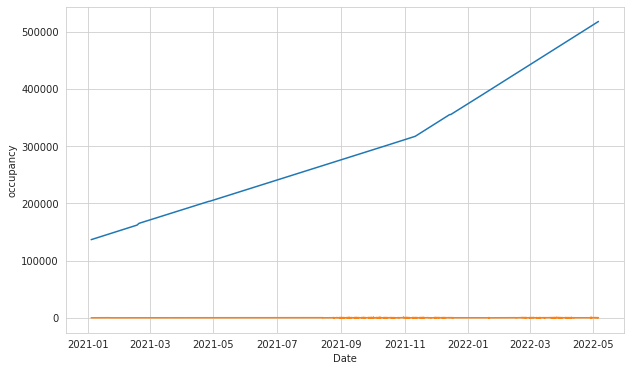

In [ ]:
## plot graph
plt.xlabel('Date')
plt.ylabel('occupancy')
plt.plot(indexedDataset)

In [ ]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(indexedDataset['occupancy'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

In [ ]:
if dftest[1] < 0.05:
    print("p val less than 0.05")

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

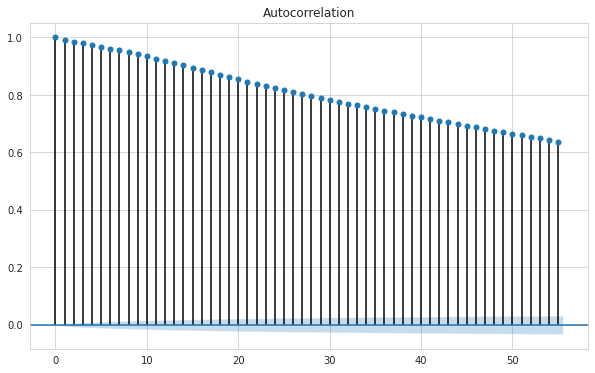

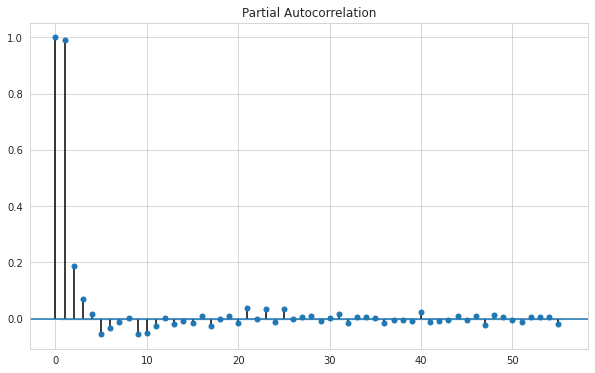

In [ ]:

acf12 = plot_acf(indexedDataset["occupancy"].dropna())
pacf12 = plot_pacf(indexedDataset["occupancy"].dropna())

In [ ]:

# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



In [ ]:
split = int(0.80*len(indexedDataset))
train_data, test_data = indexedDataset[0:split], indexedDataset[split:]


In [ ]:
train_data.shape

(222412, 2)

In [ ]:
test_data.shape

(55603, 2)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Analysis imports
from pandas.plotting import lag_plot
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas import DataFrame
from pandas import concat

# Modelling imports
from statsmodels.tsa.arima_model import ARIMA
from fbprophet import Prophet
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense
from keras.layers import Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers.core import Activation
import tensorflow as tf
from keras.initializers import glorot_uniform

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

import random
from numpy.random import seed

import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def show_graph(train, test=None, pred=None, title=None):
    
    fig = plt.figure(figsize=(20, 5))

    # entire data
    ax1 = fig.add_subplot(121)
    ax1.set_xlabel('Dates')
    ax1.set_ylabel('Price')
    ax1.plot(train.index, train['Price'], color='green', label='Train price')
    if test is not None:
        ax1.plot(test.index, test['Price'], color='red', label='Test price')
    if pred is not None:
        if 'yhat' in pred.columns:
            ax1.plot(pred.index, pred['yhat'], color = 'blue', label = 'Predicted price')
            ax1.fill_between(pred.index, pred['yhat_lower'], pred['yhat_upper'], color='grey', label="Band Range")
        else:
            ax1.plot(pred.index, pred['Price'], color='blue', label='Predicted price')
    ax1.legend()
    if title is not None:
        plt.title(title + ' (Entire)')
    plt.grid(True)

    # zoom data
    period=50
    period=int(0.2*len(train))
    ax2 = fig.add_subplot(122)
    ax2.set_xlabel('Dates')
    ax2.set_ylabel('Price')
    ax2.plot(train.index[-period:], train['Price'].tail(period), color='green', label='Train price')
    if test is not None:
        ax2.plot(test.index, test['Price'], color='red', label='Test price')
    if pred is not None:
        if 'yhat' in pred.columns:
            ax2.plot(pred.index, pred['yhat'], color = 'blue', label = 'Predicted price')
            ax2.fill_between(pred.index, pred['yhat_lower'], pred['yhat_upper'], color='grey', label="Band Range")
        else:
            ax2.plot(pred.index, pred['Price'], color='blue', label='Predicted price')
    ax2.legend()
    if title is not None:
        plt.title(title + ' (Recent ' + str(period) + ')')
    plt.grid(True)

    fig.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
def make_future_dates(last_date, period):
    prediction_dates=pd.date_range(last_date, periods=period+1, freq='B')
    return prediction_dates[1:]

def calculate_accuracy(forecast, actual, algorithm):
    mse  = round(mean_squared_error(actual, forecast),4)
    mae  = round(mean_absolute_error(actual, forecast),4)
    rmse = round(sqrt(mean_squared_error(actual, forecast)),4)
    return ({'algorithm':algorithm, 'mse':mse, 'mae':mae, 'rmse': rmse})

In [ ]:
def evaluate_arima_model(train, test, order, maxlags=8, ic='aic'):
    # feature Scaling
    stdsc = StandardScaler()
    train_std = stdsc.fit_transform(train.values.reshape(-1, 1))
    test_std = stdsc.transform(test.values.reshape(-1, 1))
    # prepare training dataset
    history = [x for x in train_std]
    # make predictions
    predictions = list()
    # rolling forecasts
    for t in range(len(test_std)):
        # predict
        model = ARIMA(history, order=order)
        model_fit = model.fit(maxlags=maxlags, ic=ic, disp=0)
        yhat = model_fit.forecast()[0]
        # invert transformed prediction
        predictions.append(yhat)
        # observation
        history.append(test_std[t])
    # inverse transform
    predictions = stdsc.inverse_transform(np.array(predictions).reshape((-1)))
    # calculate mse
    mse = mean_squared_error(test, predictions)
    return predictions, mse

def evaluate_arima_models(train, test, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    pdq = list(itertools.product(p_values, d_values, q_values))
    for order in pdq:
        try:
            predictions, mse = evaluate_arima_model(train, test, order)
            if mse < best_score:
                best_score, best_cfg = mse, order
            print('Model(%s) mse=%.3f' % (order,mse))
        except:
            continue
    print('Best Model(%s) mse=%.3f' % (best_cfg, best_score)) 
    return best_cfg

def predict_arima_model(train, period, order, maxlags=8, ic='aic'):
    # Feature Scaling
    stdsc = StandardScaler()
    train_std = stdsc.fit_transform(train.values.reshape(-1, 1))
    # fit model
    model = ARIMA(train_std, order=order)
    model_fit = model.fit(maxlags=maxlags, ic=ic, disp=0)
    # make prediction
    yhat = model_fit.predict(len(train), len(train) + period -1, typ='levels')
    # inverse transform
    yhat = stdsc.inverse_transform(np.array(yhat).flatten())
    return yhat

In [ ]:
predictions, mse = evaluate_arima_model(train_data['occupancy'], test_data['occupancy'],(4,0,1))

In [ ]:
model = ARIMA(indexedDataset['occupancy'], order=(4,0,1))
model_fit = model.fit()


In [ ]:
# summary of fit model
print(model_fit.summary())


In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)      
residuals.plot()
pyplot.show()


In [ ]:
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()


In [ ]:
# summary stats of residuals
print(residuals.describe())

In [ ]:
model = ARIMA(indexedDataset['occupancy'], order=(4,0,1))

In [ ]:
# split into train and test sets
X = indexedDataset['occupancy'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(4,0,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()